<a href="https://colab.research.google.com/github/TejasOhlan/Car-Fuel-Economy-Prediction/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

In [ ]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


## Load and review data

In [ ]:
cData = pd.read_csv('auto-mpg.csv')
cData.shape


(398, 9)

In [ ]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:

#dropping/ignoring car_name 
cData = cData.drop('car name', axis=1)

# Also replacing the categorical variables with actual values
cData['origin'] = cData['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'}) 
cData.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


## Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.




In [ ]:
cData = pd.get_dummies(cData, columns=['origin'])
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


## Dealing with Missing Values

In [ ]:
#A quick summary of the data columns
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [ ]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
cData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [ ]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
cData[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [ ]:
# Missing values have a'?''
# Replace missing values with NaN
cData = cData.replace('?', np.nan)
cData[hpIsDigit['horsepower'] == False] 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [ ]:
#instead of dropping the rows, lets replace the missing values with median value. 
cData.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [ ]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller,axis=0)

cData['horsepower'] = cData['horsepower'].astype('float64')  # converting the hp column from object / string type to float


In [ ]:
print("Skewness: %f" %cData['mpg'].skew())
print("Kurtosis: %f" %cData['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


Skewness is a measure of symmetry, or more precisely, the lack of symmetry. ... Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution

##Univariate Plot
“Uni” +“Variate”  Univariate, means one variable or feature analysis. The univariate analysis basically tells us how data is distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


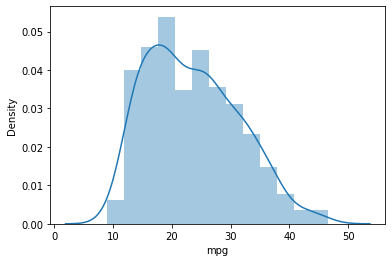

In [ ]:
sns_plot = sns.distplot(cData["mpg"])


## Multi-Variate Analysis

 means more than two variables or features are analyzed together. that how they are related to each other.

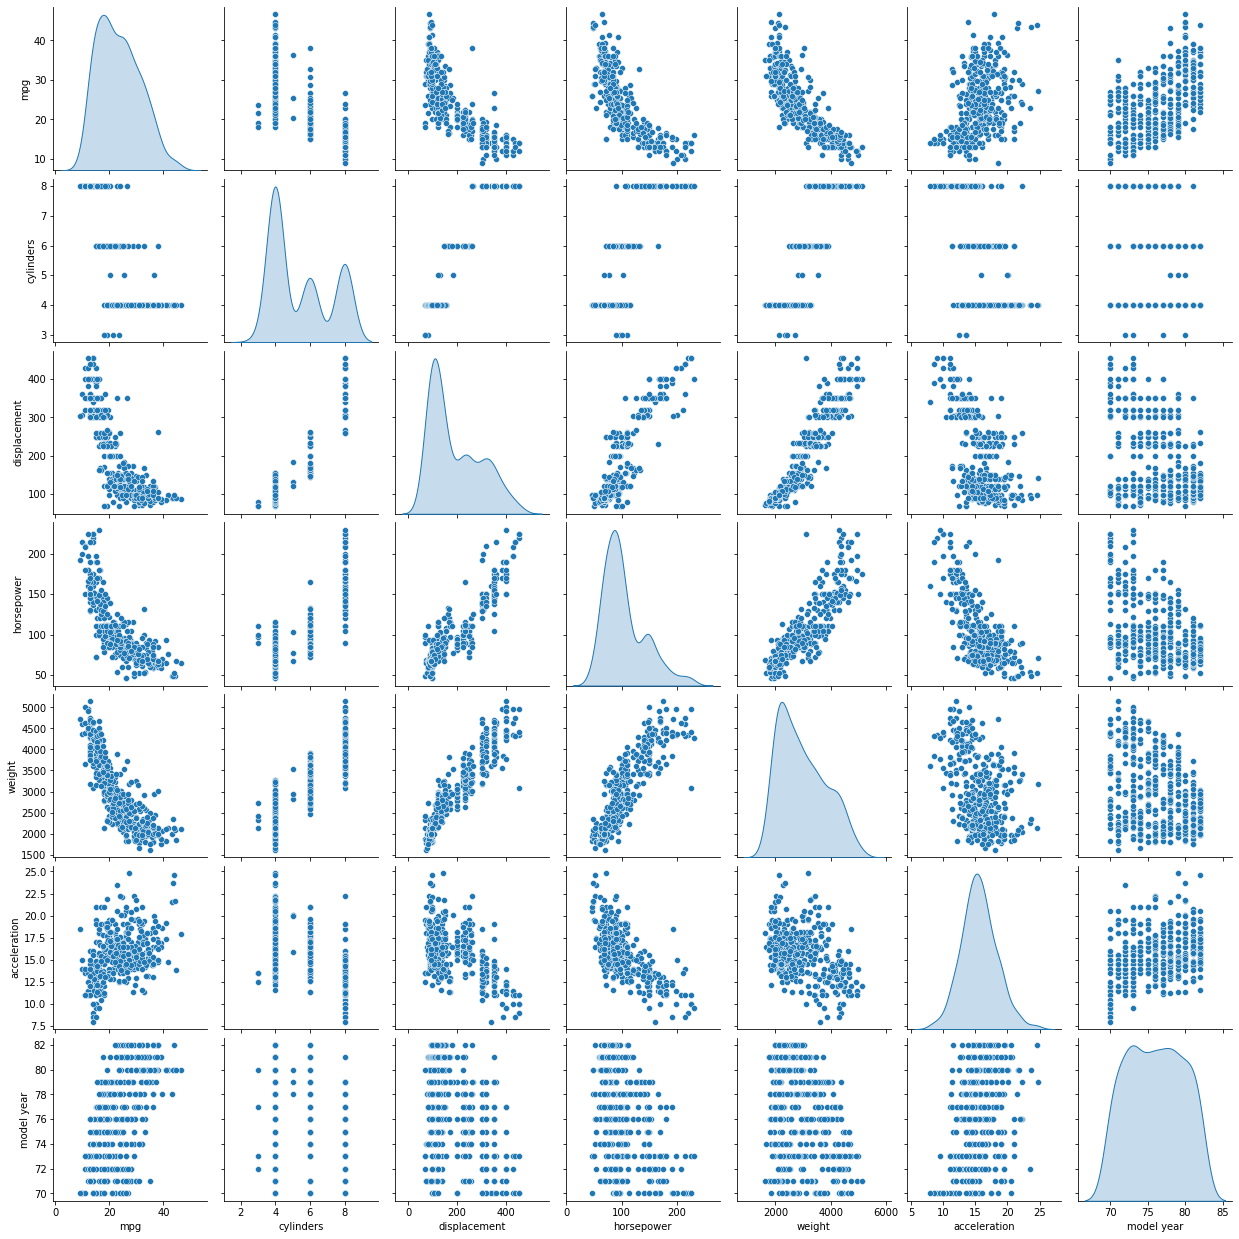

In [ ]:
cData_attr = cData.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. 



*   Nobody manufactures 7 cylinders
*   4 cylinder has better mileage performance than other and most manufactured ones.
* 8 cylinder engines have a low mileage count… of course, they focus more on pickup( fast cars).
* 5 cylinders, performance-wise, compete none neither 4 cylinders nor 6 cylinders.
* Displacement, weight, horsepower are inversely related to mileage.
* More horsepower means low mileage.




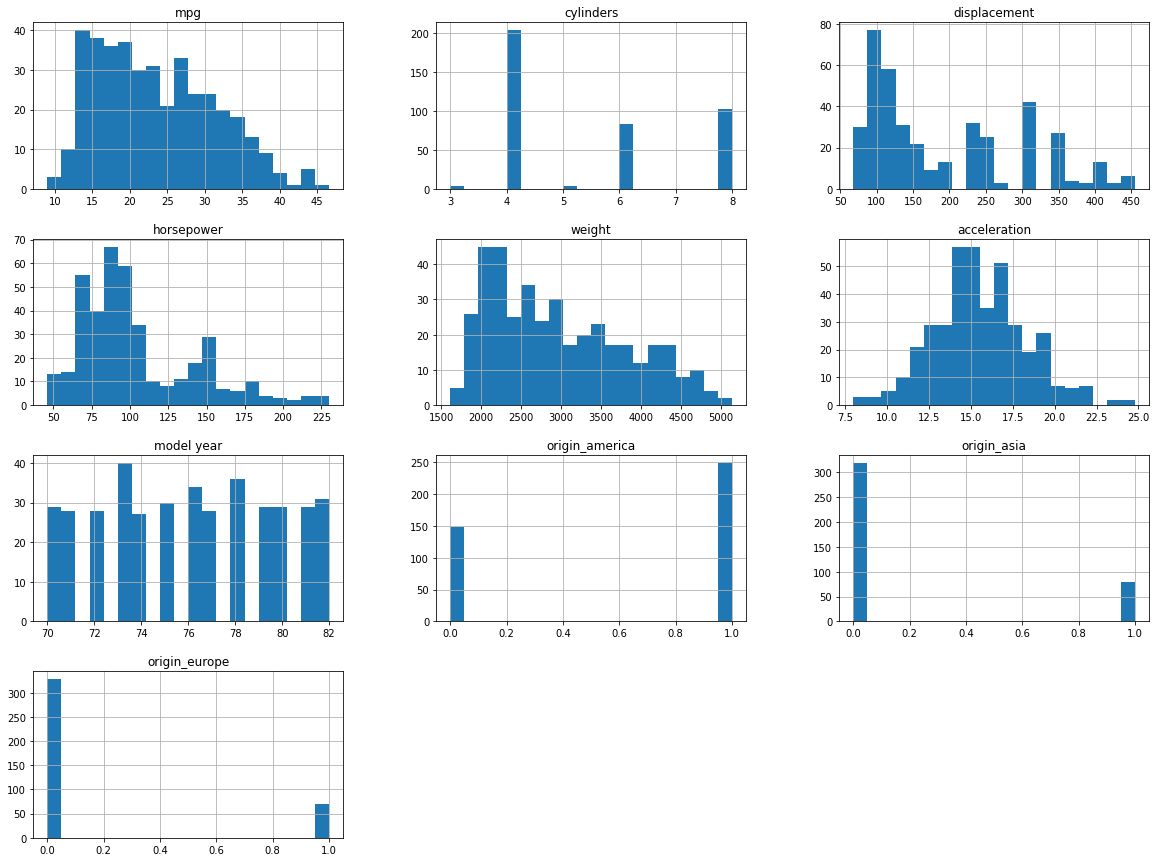

In [ ]:
cData.hist(figsize=(20,15),bins=20)
plt.show()

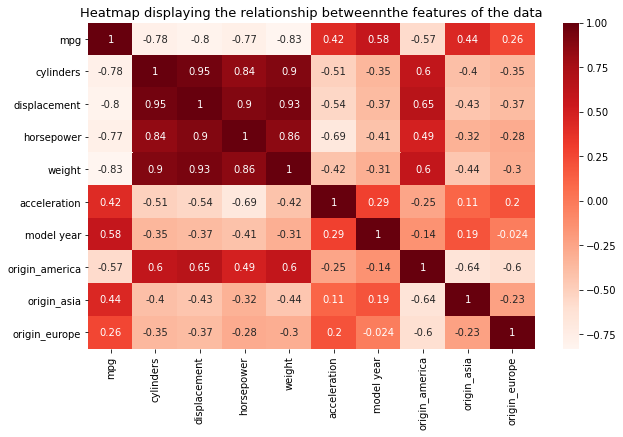

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cData.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

## Split Data

In [ ]:
# lets build our linear model
# independant variables
X = cData.drop(['mpg','origin_europe'], axis=1)
# the dependent variable
y = cData[['mpg']]

In [ ]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Fit Linear Model

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here are the coefficients for each variable and the intercept

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.39480796616482383
The coefficient for displacement is 0.028945510765487188
The coefficient for horsepower is -0.02175220772354677
The coefficient for weight is -0.007352032065147351
The coefficient for acceleration is 0.061919366007618756
The coefficient for model year is 0.836933891764499
The coefficient for origin_america is -3.001283000918514
The coefficient for origin_asia is -0.6060179643247368


In [ ]:
intercept = regression_model.intercept_[0]
#The intercept of the regression line is just the predicted value for y, when x is 0 
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.283451116372053


The score (R^2) for in-sample and out of sample

In [ ]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)


0.8433135132808833

## Adding interaction terms 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.901597529386062


In [ ]:
#Out off sample (testing) R^2 is our measure of success and does improve
print(poly_clf.score(X_test2, y_test))

0.8647441062163364


In [ ]:
# but this improves at the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 8)
(278, 37)


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly. 
